In [1]:
# Import dependices
import pandas as pd
import numpy as np

In [2]:
players=  pd.read_csv("players_22.csv")

C:\Users\Vicky\AppData\Local\Temp/ipykernel_35880/1428914065.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players=  pd.read_csv("players_22.csv")


In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
players = players.dropna(subset=features)

In [6]:
data = players[features].copy()



In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [8]:
# pseudicode
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
overall,19165.0,5.078302,1.496262,1.0,4.043478,5.130435,6.000000,11.0
potential,19165.0,5.799998,1.323418,1.0,4.913043,5.782609,6.652174,11.0
wage_eur,19165.0,1.243826,0.557253,1.0,1.014306,1.071531,1.214592,11.0
value_eur,19165.0,1.146473,0.392477,1.0,1.024022,1.049796,1.102634,11.0
age,19165.0,4.403716,1.750932,1.0,2.851852,4.333333,5.814815,11.0


In [12]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [13]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [14]:
centroids = random_centroids(data, 5)


In [15]:
centroids

,0,1,2,3,4
overall,4.260870,2.304348,5.782609,5.565217,5.565217
potential,6.000000,7.521739,4.478261,6.434783,4.043478
wage_eur,1.586552,1.000000,1.185980,1.000000,1.000000
value_eur,1.076859,1.133563,1.038198,1.049796,1.071704
age,7.666667,2.481481,6.555556,2.481481,6.925926


In [16]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [17]:
labels = get_labels(data, centroids)


In [18]:
labels.value_counts()

3    8695
2    6188
1    2300
4    1633
0     349
dtype: int64

In [19]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [21]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

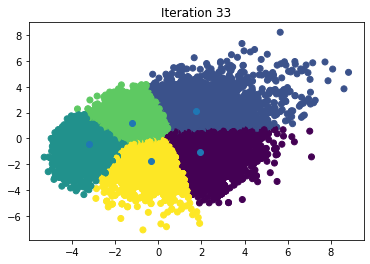

In [24]:
max_iterations = 100
centroid_count =5

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [25]:
centroids

,0,1,2,3,4
overall,5.939944,7.121276,2.677860,4.687831,4.405684
potential,5.555499,7.533207,4.807875,6.417114,4.324818
wage_eur,1.225130,1.783689,1.017760,1.081109,1.051246
value_eur,1.079724,1.530988,1.015002,1.069342,1.029686
age,6.434620,4.262323,2.442530,2.865209,5.088247


In [26]:
labels.value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        1
4        1
        ..
19234    2
19235    2
19236    2
19237    2
19238    2
Length: 19165, dtype: int64>

In [27]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
97,Z. Ibrahimović,84,84,51000.0,14500000.0,39
199,Pepe,82,82,14000.0,5500000.0,38
201,Ł. Fabiański,82,82,43000.0,3400000.0,36
284,Joaquín,81,81,23000.0,8500000.0,39
285,B. Yılmaz,81,81,39000.0,11000000.0,35
...,...,...,...,...,...,...
14405,J. McNulty,61,61,1000.0,60000.0,36
14406,C. Gauseth,61,61,650.0,100000.0,37
14850,R. Rivas,61,61,500.0,35000.0,36
14924,R. Costin,61,61,1000.0,60000.0,36


Using Library for clustering (kmeans) 

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(3)
kmeans.fit(data)

c:\Users\Vicky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [30]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T


,0,1,2
overall,6.803906,5.223612,3.883039
potential,7.243961,4.893608,5.670637
wage_eur,1.726489,1.125603,1.044082
value_eur,1.457579,1.044489,1.039567
age,4.483508,6.121214,2.899221
